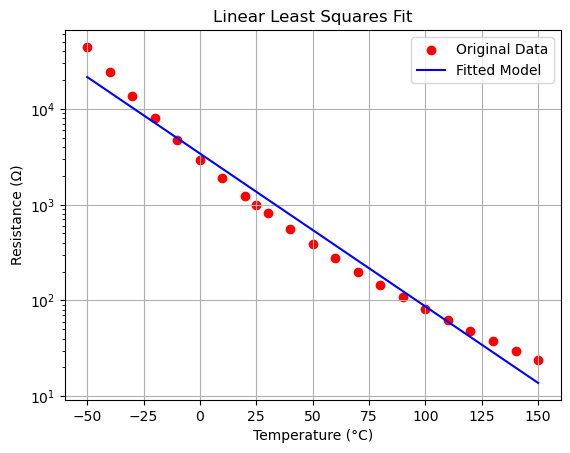

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
temp = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

#print(len(temp))
#print(temp)

resistance = np.array([44130, 23980, 13520, 7981, 4754, 2949, 1879, 1226, 1000, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68, 62.35, 48.18, 37.64, 29.72, 23.7])

#print(len(resistance))

# Apply log transformation for linearization
log_resistance = np.log(resistance)

def linear_model(T, a, b):
    return a * T + b

# Perform linear least squares fitting
params, covariance = curve_fit(linear_model, temp, log_resistance)

# Extract fitting parameters
a, b = params

# Generate fitted values
fitted_log_resistance = linear_model(temp, a, b)
fitted_resistance = np.exp(fitted_log_resistance)

# Plot data and Fitted Model
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, fitted_resistance, label="Fitted Model", color='blue')
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Linear Least Squares Fit")
plt.legend()
plt.grid()
plt.show()


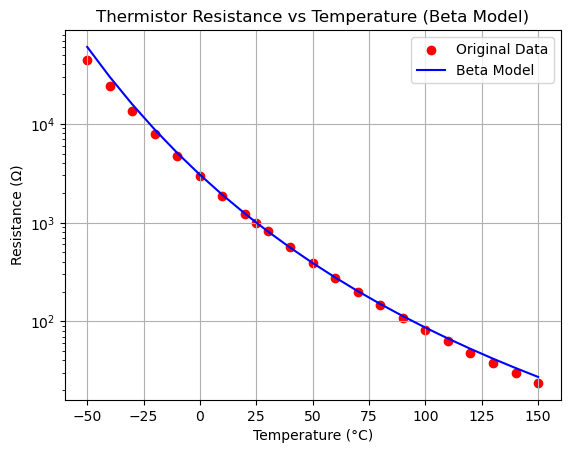

In [2]:
# Create Beta model

# Model Parameters
R0 = 1000 # nominal resistance at T0
T0 = 298.15 # Nominal temp in Kelvin
beta = 3636 # provided in datasheet

temp_kelvin = temp + 273.15 # temp array in Kelvin

# Model Resistance
B_model_resistance = R0 * np.exp(beta * ((1/temp_kelvin) - (1/T0)))

# Plot Data
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, B_model_resistance, label="Beta Model", color='blue')
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Thermistor Resistance vs Temperature (Beta Model)")
plt.legend()
plt.grid()
plt.show()

Solved Steinhart-Hart coefficients:
A = 1.532726e-03
B = 2.559045e-04
C = 1.630146e-07


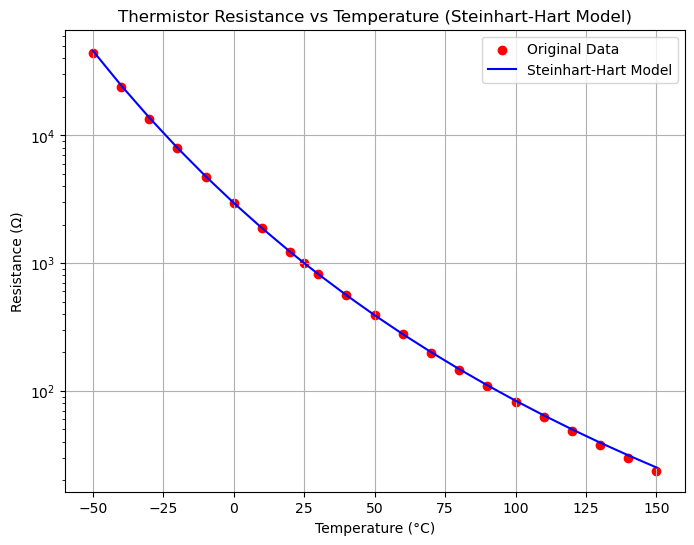

In [3]:
# Steinhart-Hart Model

# Used this calculator to verify answer:
# https://www.thinksrs.com/downloads/programs/therm%20calc/ntccalibrator/ntccalculator.html

sample_resistance = np.array([1879, 1226, 819.4])
sample_temp = np.array([10, 20, 30]) + 273.15 # temp in Kelvin

# Solving for A, B, and C
Y = 1 / sample_temp
L = np.log(sample_resistance)
M = L**3

# Set up and Solve Linear System Using Matrices 
X = np.vstack([np.ones(len(Y)), L, M]).T
params_stein = np.linalg.lstsq(X, Y, rcond=None)[0]
A, B, C = params_stein

print(f"Solved Steinhart-Hart coefficients:\nA = {A:.6e}\nB = {B:.6e}\nC = {C:.6e}")

# Compute Resistance using parameters
def steinhart_hart_equation(T):
    y = (A - (1/(T + 273.151))) / C
    x = np.sqrt(((B / (3*C))**3) + ((y**2) / 4))
    return np.exp(((x - (y/2))**(1/3)) - ((x + (y/2))**(1/3)))

steinhart_hart_resistance = steinhart_hart_equation(temp)

plt.figure(figsize=(8, 6))
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, steinhart_hart_resistance, label="Steinhart-Hart Model", color='blue')
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Thermistor Resistance vs Temperature (Steinhart-Hart Model)")
plt.legend()
plt.grid()
plt.show()

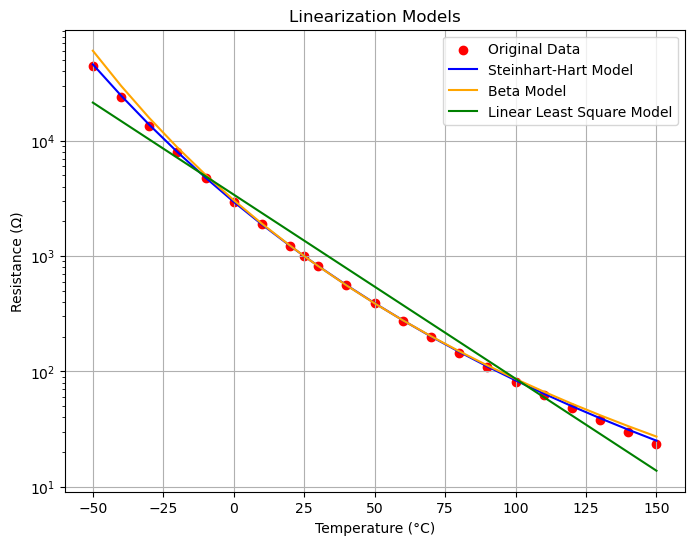

In [4]:
# Plot all models on the same graph (Figure 1)
plt.figure(figsize=(8, 6))
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, steinhart_hart_resistance, label="Steinhart-Hart Model", color='blue')
plt.plot(temp, B_model_resistance, label="Beta Model", color='orange')
plt.plot(temp, fitted_resistance, label="Linear Least Square Model", color='green')
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Linearization Models")
plt.legend()
plt.grid()
plt.show()

Create a labeled plot with all three models over the entire range of the sensor. Call this Figure 1. Next, apply the materials in the lecture slides to linearize the sensor’s response. Write code so this can be done generically as the following will ask you to change values.
- Use the 3-point method and linearize the sensor over a small region. Here small region means +/- 10 degrees from room temperature. Assume room temp is 20 degrees Celsius. Make a figure showing the nonlinear model over the small region AND the linearized response.
- Use the ‘force-an-inflection-point’ method around room temperature to linearize the sensor. Add this to your last plot.
- Use the 3-point method and linearize the sensor over the largest region you can solve for. Note that a negative value of resistance means the range is too large. We will be using passive components so <0 is our limit (But... negative resistance...
https://link.springer.com/content/pdf/10.1007/978-3-030-00740-9_3.pdf and https://www.testandmeasurementtips.com/meaning-measurement-negative-resistance/
is quite interesting!) Make a new figure showing the nonlinear model over the region and the linearized response.

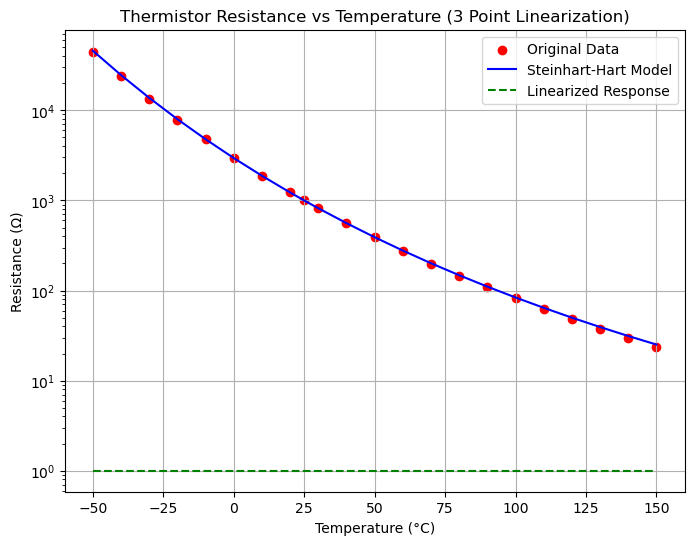

Equivalent Resistance: 
 R = 929.1120129870134


In [23]:
# Linearization using 3-point method

# Define the small region around room temperature (20°C)
three_point_temp_range = np.array([10, 20, 30])

# Get the corresponding resistance values from the Steinhart-Hart model
three_point_region_resistance = steinhart_hart_equation(three_point_temp_range)

# Fit a linear model to the small region
three_point_log_resistance = np.log(three_point_region_resistance)
three_point_params, _ = curve_fit(linear_model, three_point_temp_range, three_point_log_resistance)
small_region_a, small_region_b = three_point_params

#print(three_point_params)

# Generate the linearized response
linearized_log_resistance = linear_model(temp, small_region_a, small_region_b)
linearized_resistance = np.exp(linearized_log_resistance)

#print(linearized_log_resistance)

# Plot the nonlinear model and the linearized response
plt.figure(figsize=(8, 6))
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, steinhart_hart_resistance, label="Steinhart-Hart Model", color='blue')
plt.plot(temp, linearized_resistance, label="Linearized Response", color='green', linestyle='--')
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Thermistor Resistance vs Temperature (3 Point Linearization)")
plt.legend()
plt.grid()
plt.show()

# Resistance values for 10°C, 20°C, and 30°C, respectively
R1, R2, R3 = 1879, 1226, 819.4

R = (R2*(R1 + R3) - (2*R1*R3)) / (R1 + R3 - (2*R2))
print(f'Equivalent Resistance: \n R = {R}')

Optimal linearizing resistor: 722.28 Ω


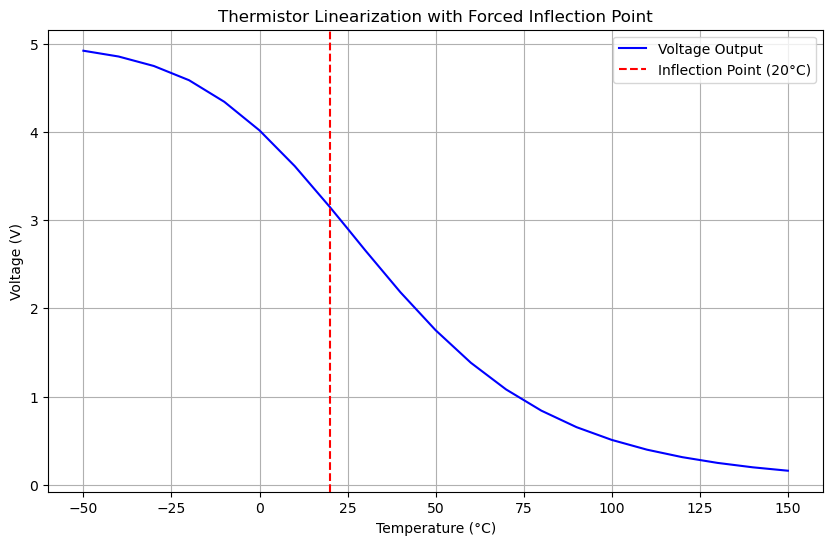

In [6]:
# Thermistor parameters from datasheet
R0 = 1000  # Reference Resistance at 25°C (Ω)
T0 = 25 + 273.15  # Reference temperature in Kelvin
B = 3636  # Beta value
T_inflect = 20 + 273.15  # Inflection temperature (20°C in Kelvin)

# Calculate linearizing resistor using inflection point formula
R_linearize = R0 * ((B - (2 * T_inflect)) / (B + (2 * T_inflect)))
print(f"Optimal linearizing resistor: {R_linearize:.2f} Ω")

# Calculate the Location of the Inflection Point
R_inflection = 1226  # Resistance at 20°C (Ω)

# Half Bridge Output (assuming Vcc = 5V)
Vcc = 5
Vout = Vcc * resistance / (resistance + R_linearize)

# Plot settings
plt.figure(figsize=(10, 6))
plt.plot(temp, Vout, 'b-', label='Voltage Output')
plt.axvline(x = 20, color = 'r', linestyle= '--', label = 'Inflection Point (20°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Voltage (V)')
plt.title('Thermistor Linearization with Forced Inflection Point')
plt.legend()
plt.grid(True)
plt.show()

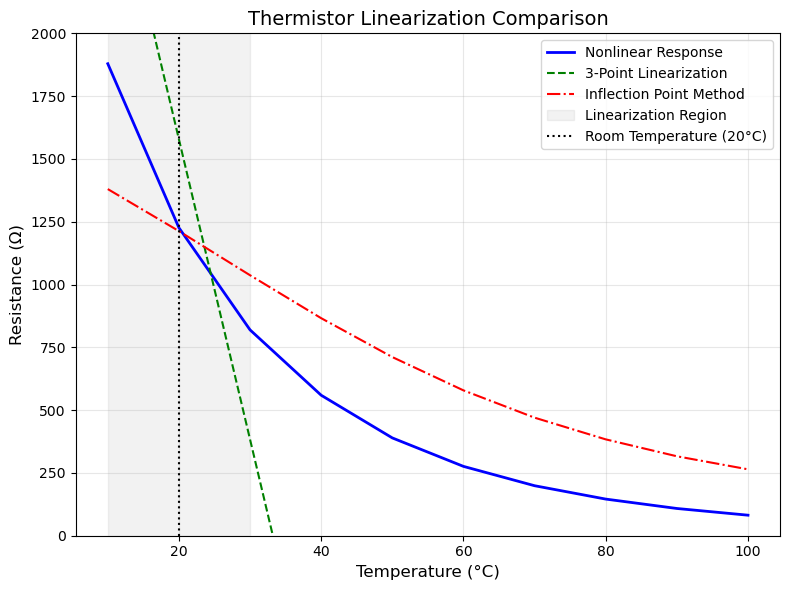

Resistance at 20°C (3-Point Linearization): 1578.07 Ω


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ===========================================
# User-Adjustable Parameters
# ===========================================
# For 3-point linearization
CENTER_TEMP = 20     # Center temperature (°C)
DELTA_TEMP = 10      # ± range from center (°C)

# ===========================================
# Thermistor Parameters (from datasheet)
# ===========================================
R0 = 1000  # Resistance at 25°C (Ω)
B = 3636   # Beta value (K)
T_room = 20  # Room temperature (°C)
Vcc = 5     # Supply voltage

# ===========================================
# Resistance-Temperature Data (from datasheet)
# ===========================================
temp_c = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
resistance = np.array([1879, 1226, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68])

# ===========================================
# 3-Point Linearization Method (10°C-30°C)
# ===========================================
# Select 3 points: [10°C, 20°C, 30°C]
x_3pt = np.array([10, 20, 30])
#x_3pt = np.array([0, 20, 40])

y_3pt = np.array([2949, 1226, 559.2])

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_3pt, y_3pt)
lin_3pt = slope * temp_c + intercept

# ===========================================
# Forced Inflection Point Method (20°C)
# ===========================================
# Calculate linearizing resistor
T_inflect = T_room + 273.15  # Convert to Kelvin
R_linearize = R0 * (B - 2*T_inflect) / (B + 2*T_inflect)

# Calculate voltage output and normalize to resistance scale
V_inflect = Vcc * resistance / (resistance + R_linearize)
V_norm = V_inflect * (max(resistance)-min(resistance))/Vcc + min(resistance)

# ===========================================
# Plotting with y-axis limits
# ===========================================
plt.figure(figsize=(8, 6))

# Original resistance curve
plt.plot(temp_c, resistance, 'b-', label='Nonlinear Response', linewidth=2)

# 3-Point Linearization
plt.plot(temp_c, lin_3pt, 'g--', label='3-Point Linearization', linewidth=1.5)

# Inflection Point Linearization
plt.plot(temp_c, V_norm, 'r-.', label='Inflection Point Method', linewidth=1.5)

# Highlight region of interest
plt.axvspan(10, 30, alpha=0.1, color='gray', label='Linearization Region')
plt.axvline(x = 20, color = 'k', linestyle = ':', label = 'Room Temperature (20°C)')

# Set y-axis limits
plt.ylim(0, 2000)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Resistance (Ω)', fontsize=12)
plt.title('Thermistor Linearization Comparison', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Resistance at 20°C (3-Point Linearization): {lin_3pt[temp_c == 20][0]:.2f} Ω")

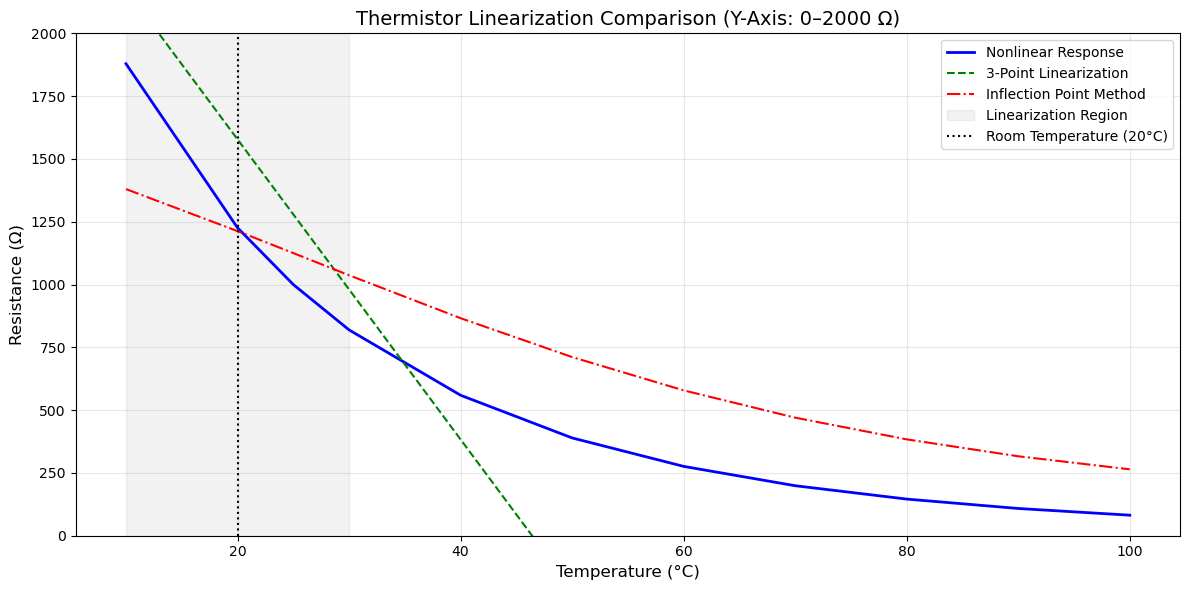

Resistance at 20°C (3-Point Linearization): 949.53 Ω


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ===========================================
# Thermistor Parameters (from datasheet)
# ===========================================
R0 = 1000  # Resistance at 25°C (Ω)
B = 3636   # Beta value (K)
T_room = 20  # Room temperature (°C)
Vcc = 5     # Supply voltage

# ===========================================
# Resistance-Temperature Data (from datasheet)
# ===========================================
temp_c = np.array([10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100])
resistance = np.array([1879, 1226, 1000, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68])

# ===========================================
# 3-Point Linearization Method (10°C-30°C)
# ===========================================
# Select 3 points: [10°C, 20°C, 30°C]
x_3pt = np.array([0, 20, 40])
y_3pt = np.array([2949, 1226, 559.2])

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_3pt, y_3pt)
lin_3pt = slope * temp_c + intercept

# ===========================================
# Forced Inflection Point Method (20°C)
# ===========================================
# Calculate linearizing resistor
T_inflect = T_room + 273.15  # Convert to Kelvin
R_linearize = R0 * (B - 2*T_inflect) / (B + 2*T_inflect)

# Calculate voltage output and normalize to resistance scale
V_inflect = Vcc * resistance / (resistance + R_linearize)
V_norm = V_inflect * (max(resistance)-min(resistance))/Vcc + min(resistance) #

# ===========================================
# Plotting with y-axis limits
# ===========================================
plt.figure(figsize=(12, 6))

# Original resistance curve
plt.plot(temp_c, resistance, 'b-', label='Nonlinear Response', linewidth=2)

# 3-Point Linearization
plt.plot(temp_c, lin_3pt, 'g--', label='3-Point Linearization', linewidth=1.5)

# Inflection Point Linearization
plt.plot(temp_c, V_norm, 'r-.', label='Inflection Point Method', linewidth=1.5)

# Highlight region of interest
plt.axvspan(10, 30, alpha=0.1, color='gray', label='Linearization Region')
plt.axvline(x=20, color='k', linestyle=':', label='Room Temperature (20°C)')

# Set y-axis limits
plt.ylim(0, 2000)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Resistance (Ω)', fontsize=12)
plt.title('Thermistor Linearization Comparison (Y-Axis: 0–2000 Ω)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

R1 = y_3pt[0]
R2 = y_3pt[1]
R3 = y_3pt[2]
resistance_3pt = (R2*(R1 + R3) - (2*R1*R3)) / (R1 + R3 - (2*R2))
print(f"Resistance at 20°C (3-Point Linearization): {resistance_3pt:.2f} Ω")

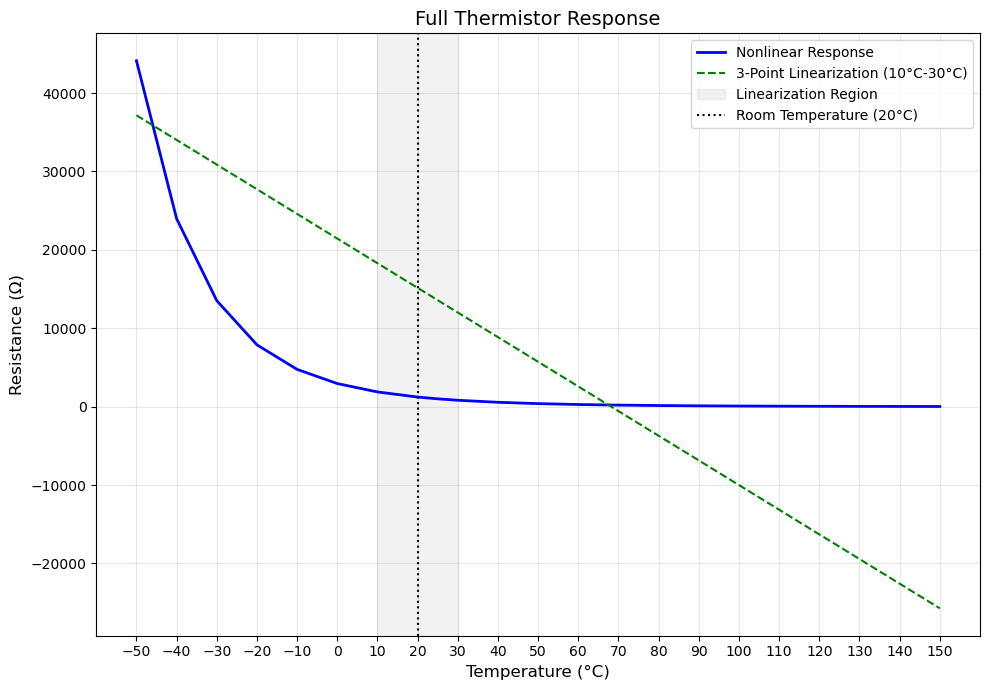

Resistance at 20°C (3-Point Linearization): 1068.98 Ω


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ===========================================
# Full Resistance-Temperature Data (from datasheet)
# ===========================================
temp_c = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 
                   60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
resistance = np.array([44130, 23980, 13520, 7891, 4754, 2949, 1879, 1226, 
                       1000, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 
                       81.68, 62.35, 48.18, 37.64, 29.72, 23.7])

# ===========================================
# 3-Point Linearization (10°C-30°C region)
# ===========================================
# Select points around room temperature (20°C)
x_3pt = np.array([-50, 20, 90])
y_3pt = np.array([44130, 1226, 108.4])

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_3pt, y_3pt)
lin_3pt = slope * temp_c + intercept

# ===========================================
# Forced Inflection Point Method (20°C)
# ===========================================
R0 = 1000  # Resistance at 25°C (Ω)
B = 3636   # Beta value (K)
T_inflect = 20 + 273.15  # Inflection temperature (20°C)
Vcc = 5

# Calculate linearizing resistor
R_linearize = R0 * (B - 2*T_inflect) / (B + 2*T_inflect)

# Calculate voltage output and normalize to resistance scale
V_inflect = Vcc * resistance / (resistance + R_linearize)
V_norm = V_inflect * (max(resistance)-min(resistance))/Vcc + min(resistance)

# ===========================================
# Plotting Full Range
# ===========================================
plt.figure(figsize=(10, 7))

# Original nonlinear response (log scale for clarity)
plt.plot(temp_c, resistance, 'b-', label='Nonlinear Response', linewidth=2)

# 3-Point Linearization
plt.plot(temp_c, lin_3pt, 'g--', label='3-Point Linearization (10°C-30°C)', linewidth=1.5)

# Inflection Point Method
#plt.plot(temp_c, V_norm, 'r-.', label='Inflection Point @ 20°C', linewidth=1.5)

# Highlight linearization region
plt.axvspan(10, 30, alpha=0.1, color='gray', label='Linearization Region')
plt.axvline(x =20, color='k', linestyle=':', label='Room Temperature (20°C)')

# Formatting
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Resistance (Ω)', fontsize=12)
plt.title('Full Thermistor Response', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, which='both', alpha=0.3)
plt.xticks(np.arange(-50, 151, 10))
plt.tight_layout()
plt.show()

# print resistance for 3-point linearization at 20°C
R1 = y_3pt[0]
R2 = y_3pt[1]
R3 = y_3pt[2]
resistance_3pt = (R2*(R1 + R3) - (2*R1*R3)) / (R1 + R3 - (2*R2))
print(f"Resistance at 20°C (3-Point Linearization): {resistance_3pt:.2f} Ω")

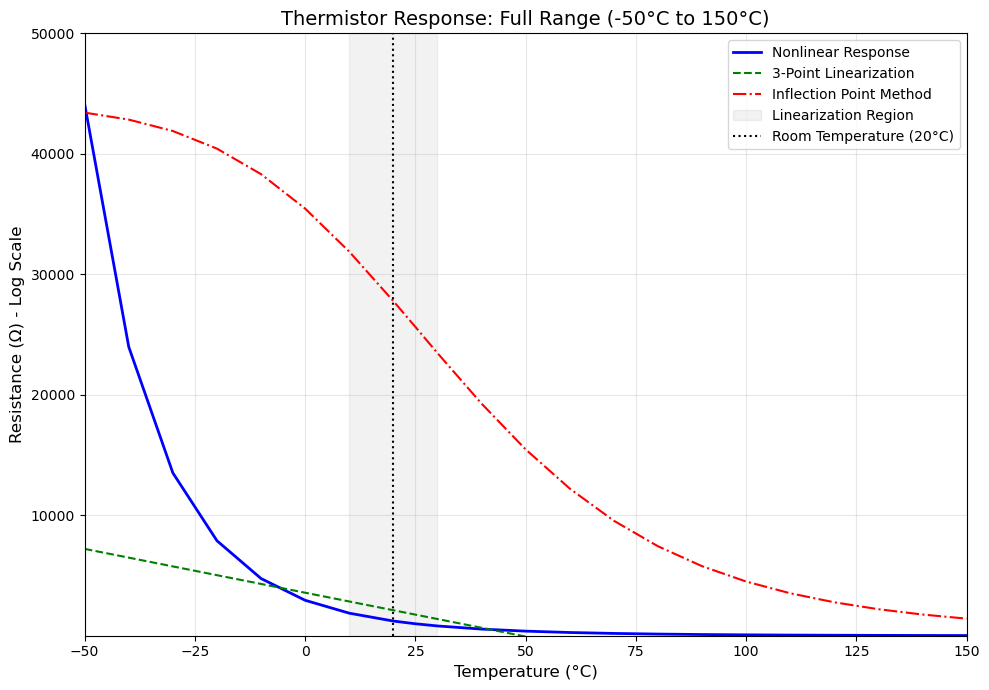

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ===========================================
# Thermistor Parameters (from datasheet)
# ===========================================
R0 = 1000  # Resistance at 25°C (Ω)
B = 3636   # Beta value (K)
T_room = 20  # Room temperature (°C)
Vcc = 5     # Supply voltage

# ===========================================
# Full Resistance-Temperature Data
# ===========================================
temp_c = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 
                   70, 80, 90, 100, 110, 120, 130, 140, 150])
resistance = np.array([44130, 23980, 13520, 7891, 4754, 2949, 1879, 1226, 1000, 
                       819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68, 
                       62.35, 48.18, 37.64, 29.72, 23.7])

# ===========================================
# 3-Point Linearization Method (10°C-30°C)
# ===========================================
# Select 3 points: [10°C, 20°C, 30°C]
x_3pt = np.array([-10, 20, 50])
y_3pt = np.array([4754, 1226, 389.3])

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_3pt, y_3pt)
lin_3pt = slope * temp_c + intercept  # Extend across full range

# ===========================================
# Forced Inflection Point Method (20°C)
# ===========================================
# Calculate linearizing resistor
T_inflect = T_room + 273.15  # Convert to Kelvin
R_linearize = R0 * (B - 2*T_inflect) / (B + 2*T_inflect)

# Calculate voltage output and normalize to resistance scale
V_inflect = Vcc * resistance / (resistance + R_linearize)
V_norm = V_inflect * (max(resistance)-min(resistance))/Vcc + min(resistance)

# ===========================================
# Plotting with Full Range
# ===========================================
plt.figure(figsize=(10, 7))

# Original resistance curve (log scale for clarity)
plt.plot(temp_c, resistance, 'b-', label='Nonlinear Response', linewidth=2)

# 3-Point Linearization
plt.plot(temp_c, lin_3pt, 'g--', label='3-Point Linearization', linewidth=1.5)

# Inflection Point Linearization
plt.plot(temp_c, V_norm, 'r-.', label='Inflection Point Method', linewidth=1.5)

# Highlight regions
plt.axvspan(10, 30, alpha=0.1, color='gray', label='Linearization Region')
plt.axvline(x=20, color='k', linestyle=':', label='Room Temperature (20°C)')

# Formatting
plt.xlim(-50, 150)
plt.ylim(10, 50000)  # Covers full resistance range
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Resistance (Ω) - Log Scale', fontsize=12)
plt.title('Thermistor Response: Full Range (-50°C to 150°C)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()